In [27]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.decomposition import IncrementalPCA
import matplotlib.pyplot as plt

In [22]:
data = pd.read_csv('spambase.data.txt', header=None)
data.rename(columns={57:'is_spam'}, inplace=True)
X = []
Y = []
with open("spambase.data.txt") as f:
    for i,line in enumerate(f):
        line= line.strip()
        line = line.split(',')
        line2 = [float(i) for i in line]
        X.append(line2[:len(line2)-1])
        Y.append(line2[len(line2)-1:][0])

In [25]:
def reduce_component_classify():
    scores = []
    for components in range(1,58):
        pca = IncrementalPCA(n_components=components)
        reduced_X = pca.fit_transform(X)
        X_test = reduced_X[int(0.9*len(X)):]
        Y_test = Y[int(0.9*len(Y)):]
        X_train = reduced_X[:int(0.9*len(X))]
        Y_train = Y[:int(0.9*len(Y))]
        classifier = tree.DecisionTreeClassifier()
        classifier = classifier.fit(X_train, Y_train)
        predicted_labels = classifier.predict(X_test)
        score = accuracy_score(Y_test,predicted_labels)
        scores.append(score * 100)
        
    return scores


scores = reduce_component_classify()

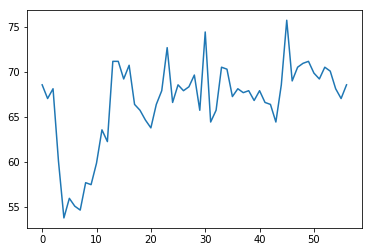

In [28]:
plt.plot(scores)

In [36]:
scores.index(max(scores)) + 1

46